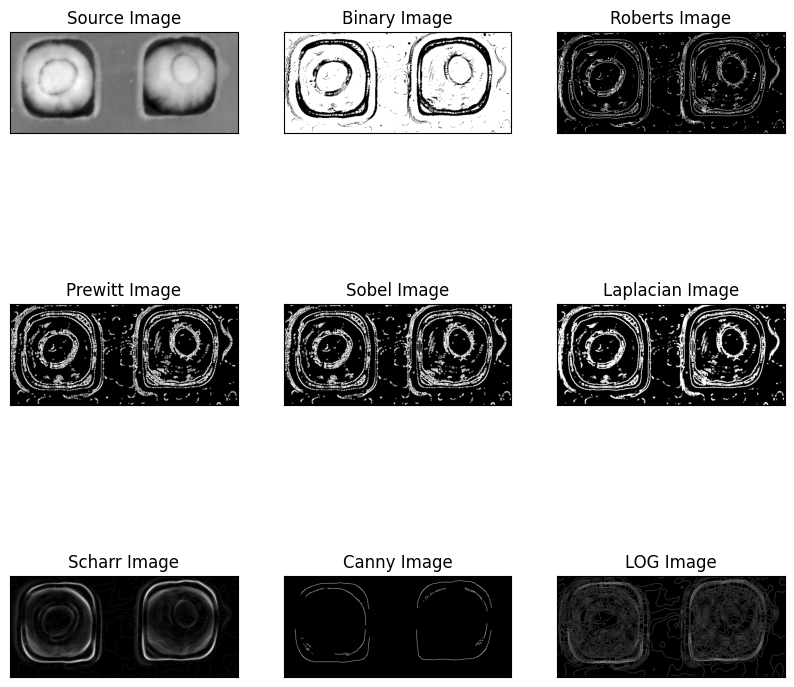

In [84]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图像 灰度化处理图像
img = cv2.imread('killme2.jpg',cv2.IMREAD_GRAYSCALE)
 
grayImage = img

grayImage = cv2.medianBlur(grayImage, 21)
#高斯滤波
gaussianBlur = cv2.GaussianBlur(grayImage, (3,3), 0)
 
#阈值处理
#ret, binary = cv2.threshold(gaussianBlur, 150, 255, cv2.THRESH_BINARY)
#自适应阈值处理
binary = cv2.adaptiveThreshold(src=gaussianBlur,maxValue=255,adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,thresholdType=cv2.THRESH_BINARY,blockSize=11,C=1)  
 
 
#Roberts算子
kernelx = np.array([[-1,0],[0,1]], dtype=int)
kernely = np.array([[0,-1],[1,0]], dtype=int)
x = cv2.filter2D(binary, cv2.CV_16S, kernelx)
y = cv2.filter2D(binary, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)     
absY = cv2.convertScaleAbs(y)    
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
 
#Prewitt算子
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=int)
x = cv2.filter2D(binary, cv2.CV_16S, kernelx)
y = cv2.filter2D(binary, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)  
absY = cv2.convertScaleAbs(y)    
Prewitt = cv2.addWeighted(absX,0.5,absY,0.5,0)
 
#Sobel算子
x = cv2.Sobel(binary, cv2.CV_16S, 1, 0)
y = cv2.Sobel(binary, cv2.CV_16S, 0, 1)    
absX = cv2.convertScaleAbs(x)   
absY = cv2.convertScaleAbs(y)    
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
 
#拉普拉斯算法
dst = cv2.Laplacian(binary, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst)
 
# Scharr算子
x = cv2.Scharr(gaussianBlur, cv2.CV_32F, 1, 0) #X方向
y = cv2.Scharr(gaussianBlur, cv2.CV_32F, 0, 1) #Y方向
absX = cv2.convertScaleAbs(x)       
absY = cv2.convertScaleAbs(y)
Scharr = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
 
#Canny算子
Canny = cv2.Canny(gaussianBlur, 20, 30)
 
#先通过高斯滤波降噪
gaussian = cv2.GaussianBlur(grayImage, (3,3), 0)
 
#再通过拉普拉斯算子做边缘检测
dst = cv2.Laplacian(gaussian, cv2.CV_16S, ksize = 3)
LOG = cv2.convertScaleAbs(dst)
 
#效果图
fig = plt.figure(figsize=(10, 10))#设置大小
titles = ['Source Image', 'Binary Image', 'Roberts Image',
          'Prewitt Image','Sobel Image', 'Laplacian Image',
          'Scharr Image', 'Canny Image', 'LOG Image']  
images = [img, binary, Roberts,
          Prewitt, Sobel, Laplacian,
          Scharr, Canny, LOG]  
for i in np.arange(9):  
   plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  
fig.savefig('fig-sharp.jpg',bbox_inches='tight')

In [2]:
import cv2
import numpy as np

In [3]:
img = cv2.imread('e1.PNG',cv2.IMREAD_GRAYSCALE)

ellips = ((172.3768310546875, 418.75390625), (107.32447052001953, 172.37796020507812), 95.15731811523438)

In [26]:
cv2.ellipse(img,ellips,(255,0,0),1)
cv2.imshow('img',img)
cv2.waitKey(0)

13

In [6]:
def is_ellipse_outside(image, ellipse, threshold=0.5):
    """
    判断椭圆是否大部分在图像外
    :param image: 输入图像
    :param ellipse: 椭圆参数 ((center_x, center_y), (major_axis, minor_axis), angle)
    :param threshold: 判断阈值，大于该比例即认为椭圆大部分在图像外
    :return: 是否大部分在外 (True/False), 椭圆外部像素比例
    """
    image_height, image_width = image.shape[:2]
    center, axes, angle = ellipse
    center_x, center_y = center
    major_axis, minor_axis = axes

    # 创建空白图像
    ellipse_mask = np.zeros((image_height, image_width), dtype=np.uint8)

    # 绘制椭圆到空白图像
    cv2.ellipse(ellipse_mask, ellipse, 255, thickness=-1)

    # 统计椭圆像素总数
    ellipse_area = np.sum(ellipse_mask > 0)

    if ellipse_area == 0:
        return True

    # 截取在图像范围内的部分
    mask_within_bounds = ellipse_mask[:image_height, :image_width]
    inside_area = np.sum(mask_within_bounds > 0)

    # 计算椭圆外部像素比例
    outside_area_ratio = 1 - (inside_area / ellipse_area)

    # 判断是否大部分在图像外
    is_outside = outside_area_ratio > threshold

    return is_outside, outside_area_ratio

In [7]:
is_ellipse_outside(img,((239.7792510986328, 425.617431640625), (114.18795013427734, 165.92532348632812), 105.82388305664062))

(False, 0.0)